In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import pandas as pd
from pathlib import Path


base_path = Path("../")
data_dir_path = base_path.joinpath("data/NCEI-Oakland_International_airport-standard_units")
data_file_path = data_dir_path.joinpath("prepared_weather.csv")
weather_file = pd.read_csv(data_file_path, index_col="DATE")

# Przygotowanie danych do modelu
lookback = 30
forecast_horizon = 7
epochs = 40
batch_size=16
validation_split=0.1

# Przygotowanie danych
def prepare_data(data, lookback=30, forecast_horizon=7):
    X, y = [], []

    for i in range(len(data) - lookback - forecast_horizon + 1):
        inputs = data.iloc[i:(i + lookback)][["PRECIPITATION", "TMAX", "TMIN"]].values
        output = data.iloc[(i + lookback):(i + lookback + forecast_horizon)][["PRECIPITATION", "TMAX", "TMIN"]].values
        X.append(inputs)
        y.append(output)

    return np.array(X), np.array(y)

# X, y = prepare_data(core_weather_data, lookback, forecast_horizon)
X, y = prepare_data(weather_file, lookback, forecast_horizon)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Budowa modelu
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=forecast_horizon * X_train.shape[2]))  # Output layer

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse')

# Trenowanie modelu
history = model.fit(X_train, y_train.reshape(-1, forecast_horizon * X_train.shape[2]), epochs=epochs, batch_size=batch_size, validation_split=validation_split)

# Ewaluacja modelu na danych testowych
loss = model.evaluate(X_test, y_test.reshape(-1, forecast_horizon * X_test.shape[2]))
print(f"Mean Squared Error on Test Data: {loss}")

# Predykcje na danych testowych
predictions = model.predict(X_test)

Epoch 1/40
390/390 [==============================] - 0s 761us/step - loss: 48.2447 - val_loss: 23.5775
Epoch 2/40
390/390 [==============================] - 0s 556us/step - loss: 22.1879 - val_loss: 18.8245
Epoch 3/40
390/390 [==============================] - 0s 543us/step - loss: 18.7835 - val_loss: 16.8599
Epoch 4/40
390/390 [==============================] - 0s 550us/step - loss: 17.1030 - val_loss: 15.6642
Epoch 5/40
390/390 [==============================] - 0s 544us/step - loss: 16.2009 - val_loss: 14.9568
Epoch 6/40
390/390 [==============================] - 0s 569us/step - loss: 15.5444 - val_loss: 14.5745
Epoch 7/40
390/390 [==============================] - 0s 562us/step - loss: 15.1083 - val_loss: 14.1975
Epoch 8/40
390/390 [==============================] - 0s 542us/step - loss: 14.7906 - val_loss: 13.9019
Epoch 9/40
390/390 [==============================] - 0s 584us/step - loss: 14.5311 - val_loss: 13.7954
Epoch 10/40
390/390 [==============================] - 0s 572us/

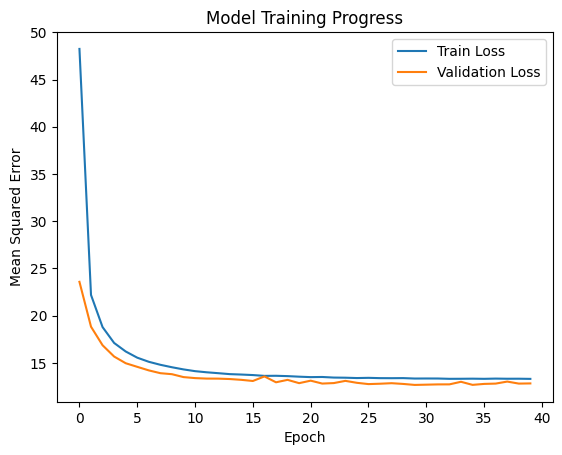

In [22]:
import matplotlib.pyplot as plt

# Rysowanie wykresu funkcji straty
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()